In [1]:
#Importig all required libraries
import numpy as np
import pandas as pd
import datetime
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Ignoring warnings
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Importing the data from CSV file
pd.set_option('display.max_columns', 300)
telecom = pd.read_csv('telecom_churn_data.csv')

## Data preparation

In [3]:
telecom.shape

(99999, 226)

In [4]:
telecom.head(5)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [5]:
# Finding high value customers.
telecom['avg_rech_amt_6_7'] = (telecom['total_rech_amt_6']+telecom['total_rech_amt_7'])/2
telecom_HVC = telecom[telecom['avg_rech_amt_6_7'] >= telecom.avg_rech_amt_6_7.quantile(0.7)]
telecom_HVC.shape

(30011, 227)

In [6]:
telecom_HVC.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
count,3.001100e+04,30011.0,29897.0,29897.0,29897.0,30011.000000,30011.000000,30011.000000,30011.000000,29695.000000,29708.000000,29073.000000,28307.000000,29695.000000,29708.000000,29073.000000,28307.000000,29695.000000,29708.000000,29073.000000,28307.000000,29695.000000,29708.000000,29073.000000,28307.000000,29695.000000,29708.000000,29073.000000,28307.000000,29695.000000,29708.000000,29073.000000,28307.000000,29695.000000,29708.000000,29073.000000,28307.000000,29695.000000,29708.000000,29073.000000,28307.000000,29695.000000,29708.000000,29073.000000,28307.000000,29695.000000,29708.000000,29073.000000,28307.000000,29695.000000,29708.000000,29073.000000,28307.000000,29695.000000,29708.000000,29073.000000,28307.000000,29695.0,29708.0,29073.0,28307.0,29695.000000,29708.000000,29073.000000,28307.000000,29695.000000,29708.000000,29073.000000,28307.000000,29695.000000,2

In [7]:
#Removing total_rech_amount_6 and total_rech_amount_7 from the data
telecom_HVC = telecom_HVC.drop('avg_rech_amt_6_7', axis=1)

In [8]:
#Cleaning the imported data in order to prepare it for the analysis

#Finding out remaining columns with missing values
Drop_col = pd.DataFrame(round(100*(telecom_HVC.isnull().sum()/len(telecom_HVC.index)), 2))
Drop_col = Drop_col.reset_index()
Drop_col.rename(columns = {Drop_col.columns[1]:"Percent"}, inplace = True)

#Separating columns with at least one missing value
Drop_col = Drop_col.loc[(Drop_col['Percent'] > 0)]
Drop_col.sort_values(by = 'Percent', ascending = False, inplace = True)
Drop_col

,index,Percent
173,count_rech_3g_6,62.02
161,total_rech_data_6,62.02
157,date_of_last_rech_data_6,62.02
193,arpu_2g_6,62.02
217,fb_user_6,62.02
165,max_rech_data_6,62.02
169,count_rech_2g_6,62.02
189,arpu_3g_6,62.02
197,night_pck_user_6,62.02
177,av_rech_amt_data_6,62.02


In [9]:
#Finding columns with more than 60% missing vlaues
rem_col = Drop_col.loc[(Drop_col['Percent'] > 60)]
cols = list(rem_col['index'])
telecom_HVC.drop(cols, axis=1, inplace=True)

In [10]:
#Finding out remaining columns with missing values
Drop_col = pd.DataFrame(round(100*(telecom_HVC.isnull().sum()/len(telecom_HVC.index)), 2))
Drop_col = Drop_col.reset_index()
Drop_col.rename(columns = {Drop_col.columns[1]:"Percent"}, inplace = True)

#Separating columns with at least one missing value
Drop_col = Drop_col.loc[(Drop_col['Percent'] > 0)]
Drop_col.sort_values(by = 'Percent', ascending = False, inplace = True)
Drop_col

,index,Percent
108,std_ic_t2m_mou_9,5.68
68,std_og_mou_9,5.68
28,roam_og_mou_9,5.68
52,std_og_t2t_mou_9,5.68
32,loc_og_t2t_mou_9,5.68
72,isd_og_mou_9,5.68
116,std_ic_t2o_mou_9,5.68
36,loc_og_t2m_mou_9,5.68
128,spl_ic_mou_9,5.68
24,roam_ic_mou_9,5.68


In [11]:
#Drop the rows where 'std_ic_t2m_mou_9' is null
telecom_HVC = telecom_HVC.loc[~telecom_HVC['std_ic_t2m_mou_9'].isnull()]
#Drop the rows where 'date_of_last_rech_8' is null
telecom_HVC = telecom_HVC.loc[~telecom_HVC['date_of_last_rech_8'].isnull()]
#Drop the rows where 'date_of_last_rech_9' is null
telecom_HVC = telecom_HVC.loc[~telecom_HVC['date_of_last_rech_9'].isnull()]
#Drop the rows where 'onnet_mou_6' is null
telecom_HVC = telecom_HVC.loc[~telecom_HVC['onnet_mou_6'].isnull()]
#Drop the rows where 'std_og_t2t_mou_8' is null
telecom_HVC = telecom_HVC.loc[~telecom_HVC['std_og_t2t_mou_8'].isnull()]
#Drop the rows where 'onnet_mou_7' is null
telecom_HVC = telecom_HVC.loc[~telecom_HVC['onnet_mou_7'].isnull()]
#Drop the rows where 'date_of_last_rech_7' is null
telecom_HVC = telecom_HVC.loc[~telecom_HVC['date_of_last_rech_7'].isnull()]
#Drop the rows where 'date_of_last_rech_6' is null
telecom_HVC = telecom_HVC.loc[~telecom_HVC['date_of_last_rech_6'].isnull()]

In [12]:
#Finding out remaining columns with missing values
Drop_col = pd.DataFrame(round(100*(telecom_HVC.isnull().sum()/len(telecom_HVC.index)), 6))
Drop_col = Drop_col.reset_index()
Drop_col.rename(columns = {Drop_col.columns[1]:"Percent"}, inplace = True)

#Separating columns with at least one missing value
Drop_col = Drop_col.loc[(Drop_col['Percent'] > 0)]
Drop_col.sort_values(by = 'Percent', ascending = False, inplace = True)
Drop_col

,index,Percent


In [13]:
telecom_HVC.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,2.741800e+04,27418.0,27418.0,27418.0,27418.0,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.0,27418.0,27418.0,27418.0,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.00000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.0,27418.0,27418.0,27418.0,27418.00

In [14]:
#Deleting columns with no significant data
cols = ['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9']
telecom_HVC.drop(cols, axis=1, inplace=True)

In [15]:
#Checking number of non zero values in low varaince columns.
cols = ['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2f_mou_9', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'isd_og_mou_9', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'spl_og_mou_9', 'og_others_6', 'og_others_7', 'og_others_8', 'og_others_9', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'std_ic_t2f_mou_9', 'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8', 'spl_ic_mou_9', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8', 'isd_ic_mou_9', 'ic_others_6', 'ic_others_7', 'ic_others_8', 'ic_others_9', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'monthly_2g_9', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'sachet_2g_9', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'monthly_3g_9', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'sachet_3g_9']
for i in cols:
    df = telecom_HVC.loc[telecom_HVC[i] != 0]
    print('Non zero values in:', i + '=', df[i].count())


Non zero values in: roam_ic_mou_6= 6468
Non zero values in: roam_ic_mou_7= 5132
Non zero values in: roam_ic_mou_8= 5509
Non zero values in: roam_ic_mou_9= 5593
Non zero values in: roam_og_mou_6= 6526
Non zero values in: roam_og_mou_7= 5165
Non zero values in: roam_og_mou_8= 5504
Non zero values in: roam_og_mou_9= 5552
Non zero values in: loc_og_t2c_mou_6= 6714
Non zero values in: loc_og_t2c_mou_7= 7223
Non zero values in: loc_og_t2c_mou_8= 7338
Non zero values in: loc_og_t2c_mou_9= 6821
Non zero values in: std_og_t2f_mou_6= 4602
Non zero values in: std_og_t2f_mou_7= 4531
Non zero values in: std_og_t2f_mou_8= 4377
Non zero values in: std_og_t2f_mou_9= 4214
Non zero values in: isd_og_mou_6= 2318
Non zero values in: isd_og_mou_7= 2218
Non zero values in: isd_og_mou_8= 1933
Non zero values in: isd_og_mou_9= 2090
Non zero values in: spl_og_mou_6= 14615
Non zero values in: spl_og_mou_7= 15887
Non zero values in: spl_og_mou_8= 15729
Non zero values in: spl_og_mou_9= 14965
Non zero values in: 

In [16]:
telecom_HVC

,mobile_number,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
8,7001524846,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.00,0.00,7.15,0.00,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.00,0.00,0.00,0.00,130.26,143.48,98.28,81.46,0.00,0.00,0.00,0.00,0.00,0.00,10.23,0.00,0.00,0.0,0.0,0.0,508.36,431.66,171.56,142.18,23.84,9.84,0.31,4.03,57.58,13.98,15.48,17.34,0.00,0.00,0.00,0.00,81.43,23.83,15.79,21.38,0.00,0.58,0.10,0.00,22.43,4.08,0.65,13.53,0.00,0.00,0.00,0.00,22.43,4.66,0.75,13.53,103.86,28.49,16.54,34.91,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,15,437,601,120,186,90,154,30,36,6/25/2014,7/31/2014,8/30/2014,9/30/2014,50,0,10,0,0.00,356.00,0.03,0.00,0.00,750.95,11.94,0.00,0,1,0,0,0,1,3,0,0,0,0,0,0,0,0,0,315,21.03,910.65,122.16,0.00
13,7002191713,6/30/2014,7/31/2014,8/31/2014,9/30/2014,492.846,205.671,593.260,322.732,501.76,108.39,534.24,244.81,413.31,119.28,482.46,214.06,23.53,144.24,72.11,136.78,7.98,35.26,1.44,12.78,49.63,6.19,36.01,6.14,151.13,47.28,294.46,108.24,4.54,0.00,23.51,5.29,0.00,0.00,0.49,0.00,205.31,53.48,353.99,119.69,446.41,85.98,498.23,230.38,255.36,52.94,156.94,96.01,0.00,0.00,0.00,0.00,701.78,138.93,655.18,326.39,0.00,0.00,1.29,0.00,0.00,0.00,4.78,0.00,0.00,0.0,0.0,0.0,907.09,192.41,1015.26,446.09,67.88,7.58,52.58,24.98,142

In [17]:
#Changing the date columns to date & time format
cols = ['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']
for i in cols:
    telecom_HVC[i] = pd.to_datetime(telecom_HVC[i], infer_datetime_format=True)
telecom_HVC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27418 entries, 8 to 99997
Columns: 174 entries, mobile_number to sep_vbc_3g
dtypes: datetime64[ns](8), float64(132), int64(34)
memory usage: 36.6 MB


In [18]:
#Creating new column to get days from last recharge in a month
telecom_HVC['days_from_last_recharge_in_month_6'] = telecom_HVC['last_date_of_month_6'] - telecom_HVC['date_of_last_rech_6']
telecom_HVC['days_from_last_recharge_in_month_7'] = telecom_HVC['last_date_of_month_7'] - telecom_HVC['date_of_last_rech_7']
telecom_HVC['days_from_last_recharge_in_month_8'] = telecom_HVC['last_date_of_month_8'] - telecom_HVC['date_of_last_rech_8']
telecom_HVC['days_from_last_recharge_in_month_9'] = telecom_HVC['last_date_of_month_9'] - telecom_HVC['date_of_last_rech_9']

In [19]:
#Changing the formact from datetime to int
telecom_HVC['days_from_last_recharge_in_month_6'] = telecom_HVC['days_from_last_recharge_in_month_6']/np.timedelta64(1, 'D')
telecom_HVC['days_from_last_recharge_in_month_7'] = telecom_HVC['days_from_last_recharge_in_month_7']/np.timedelta64(1, 'D')
telecom_HVC['days_from_last_recharge_in_month_8'] = telecom_HVC['days_from_last_recharge_in_month_8']/np.timedelta64(1, 'D')
telecom_HVC['days_from_last_recharge_in_month_9'] = telecom_HVC['days_from_last_recharge_in_month_9']/np.timedelta64(1, 'D')

In [20]:
#Deleteing the original datetime columns
cols = ['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']
telecom_HVC.drop(cols, axis=1, inplace=True)

In [21]:
telecom_HVC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27418 entries, 8 to 99997
Columns: 170 entries, mobile_number to days_from_last_recharge_in_month_9
dtypes: float64(136), int64(34)
memory usage: 35.8 MB


In [22]:
#Defining function and identifying if a customer has churned
def churn(line):
    if (line['total_ic_mou_9'] + line['total_og_mou_9'] + line['vol_2g_mb_9'] + line['vol_3g_mb_9']) > 0:
        return 0
    else:
        return 1

telecom_HVC['if_churned'] = telecom_HVC.apply(lambda line:churn(line), axis=1)

In [23]:
#Removing month 9 columns from the final data set
cols = [i for i in telecom_HVC.columns if '_9' in i]
telecom_final = telecom_HVC.drop(cols, axis=1)
telecom_final

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,days_from_last_recharge_in_month_6,days_from_last_recharge_in_month_7,days_from_last_recharge_in_month_8,if_churned
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.00,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.00,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.00,356.00,0.03,0.00,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.00,5.0,0.0,1.0,0
13,7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.00,0.00,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.00,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.00,0.00,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.00,0.00,0.02,0.00,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,0.00,10.0,9.0,1.0,0
16,7000875565,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.00,0.00,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.00,0.00,0.00,30.89,67.09,21.53,0.00,0.00,0.00,0.00,3.26,5.91,0.00,0.0,0.0,346.81,286.01,233.38,41.33,71.44,28.89,226.81,149.69,150.16,8.71,8.68,32.71,276.86,229.83,211.78,68.79,78.64,6.33,18.68,73.08,73.93,0.51,0.00,2.18,87.99,151.73,82.44,364.86,381.56,294.46,0.00,0.00,0.00,0.00,0.00,0.23,0.00,0.00,0.00,10,6,2,570,348,160,110,110,130,100,100,130,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,511,0.00,2.45,21.89,0.00,0.0,0.0,17.0,0
17,7000187447,690.008,18.980,25.499

## Building model with PCA for Churn prediction

In [26]:
#Splitting data in train and test.
from sklearn.model_selection import train_test_split
X = telecom_final.drop(['if_churned','mobile_number'],axis=1)
y = telecom_final['if_churned']

In [27]:
#Splitting the data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [28]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [29]:
#Applying PCA on the dataset
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [30]:
#Let's check the components
pca.components_

array([[ 1.04269441e-01,  1.25983250e-01,  1.30313706e-01, ...,
        -4.61679649e-04, -4.55419101e-04, -5.78440469e-04],
       [ 1.33644207e-01,  1.54702457e-01,  1.64361799e-01, ...,
         1.17622652e-04, -5.18802805e-06, -1.39388716e-05],
       [-8.46451933e-02, -7.20865578e-02, -1.06158522e-01, ...,
        -1.45447087e-04, -8.27623951e-05, -1.35528627e-04],
       ...,
       [ 1.42734239e-07, -3.14335959e-07,  1.05198836e-07, ...,
        -3.73190248e-06, -2.96925264e-06,  6.61245618e-07],
       [ 2.03305904e-07, -1.26269991e-07, -1.85370854e-07, ...,
         5.52238062e-06, -5.52117539e-06,  2.55721656e-06],
       [-2.96142164e-07,  2.25244299e-08, -6.48545362e-08, ...,
         9.57560939e-06, -3.28764538e-06, -4.55113406e-06]])

In [31]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,0.104269,0.133644,arpu_6
1,0.125983,0.154702,arpu_7
2,0.130314,0.164362,arpu_8
3,0.143815,-0.009672,onnet_mou_6
4,0.169802,-0.006582,onnet_mou_7


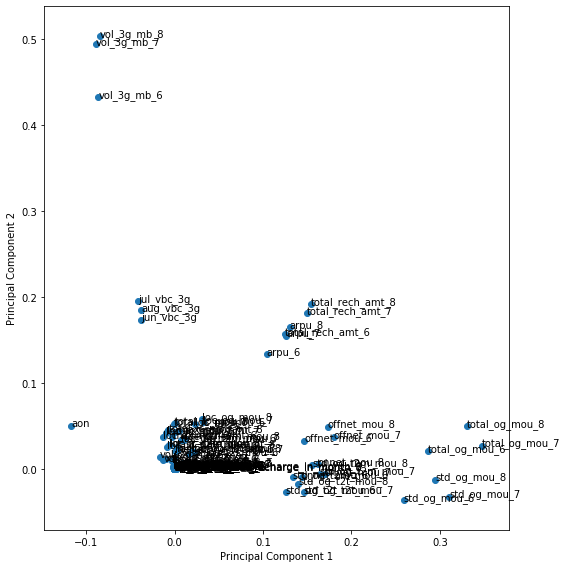

In [32]:
# Plotting the features as per their varaince

%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [33]:
#Varaince ratio of the features
pca.explained_variance_ratio_

array([2.55504891e-01, 1.66920447e-01, 1.11927780e-01, 7.62467030e-02,
       6.48719850e-02, 5.00716737e-02, 4.50060778e-02, 3.48763366e-02,
       2.40932687e-02, 1.95728436e-02, 1.68343420e-02, 1.48525848e-02,
       1.35380072e-02, 1.18007832e-02, 1.02563541e-02, 7.85263587e-03,
       7.65563574e-03, 5.91044351e-03, 5.66323809e-03, 5.01157880e-03,
       4.73796306e-03, 4.41385784e-03, 4.11544295e-03, 3.59186161e-03,
       3.29070042e-03, 2.86037277e-03, 2.64528045e-03, 2.36565014e-03,
       2.34023250e-03, 1.72768560e-03, 1.70945698e-03, 1.53537264e-03,
       1.45990431e-03, 1.39330791e-03, 1.19595256e-03, 1.04295754e-03,
       8.54747809e-04, 8.27479082e-04, 7.85752830e-04, 7.36788424e-04,
       7.09030336e-04, 6.90262449e-04, 6.12764397e-04, 6.00047431e-04,
       5.60889975e-04, 5.50648954e-04, 4.52360764e-04, 4.27062587e-04,
       4.12349404e-04, 3.76785223e-04, 3.58064578e-04, 2.60732212e-04,
       2.12504100e-04, 1.98801102e-04, 1.68649974e-04, 1.54611532e-04,
      

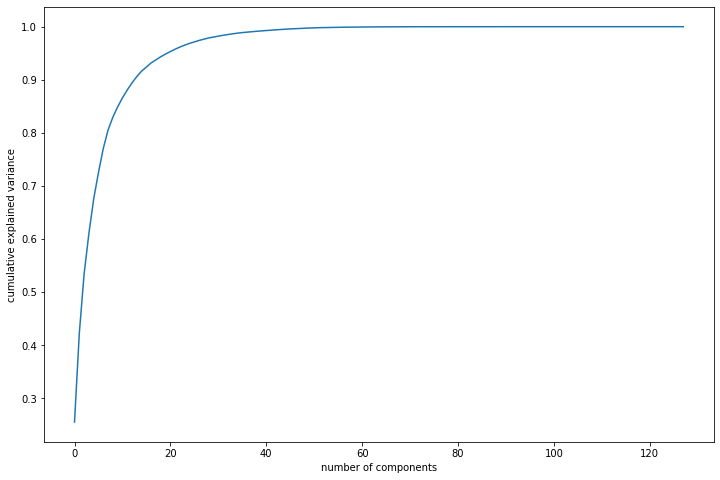

In [34]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [35]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
#As shown by the above graph, we can take 24 features as we are getting above 90% accuracy with that
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=24)

In [36]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(19192, 24)

In [37]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

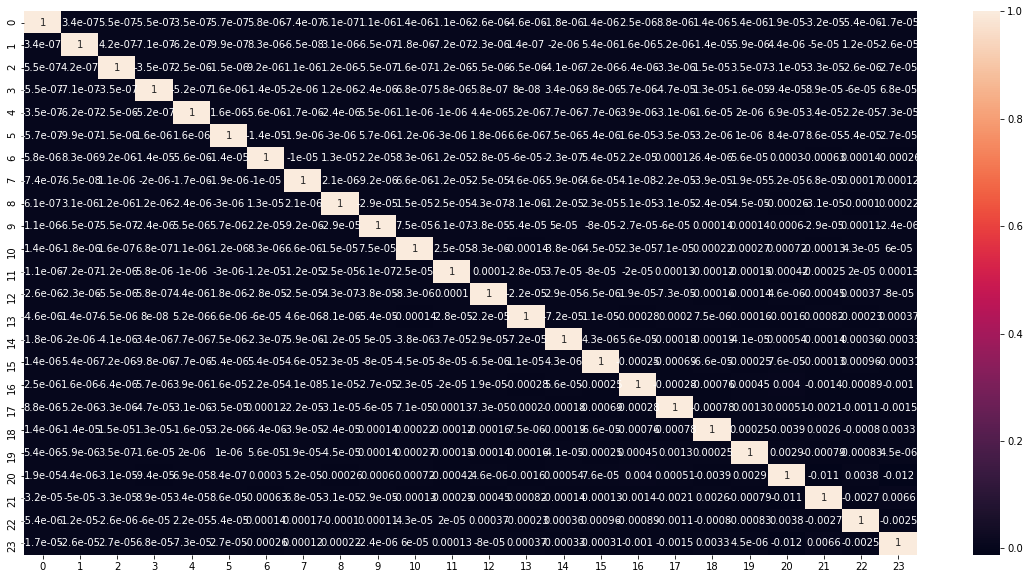

In [38]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [39]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.006575595034494295 , min corr:  -0.01193954412280021


In [40]:
#Applying selected components to the test data - 16 components
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(8226, 24)

In [42]:
#Training the model on the train data

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca,y_train)

In [43]:
#Checking the roc_auc score on the test probability based on LR model
pred_test = model_pca.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_test))

'0.87'

In [44]:
#Making predictions on test data
test_pred_churn = model_pca.predict(df_test_pca)

In [46]:
#Importing the libraries
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

#Evaluating model on test set prediction
print(classification_report(y_test,test_pred_churn))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      7950
           1       0.63      0.04      0.08       276

    accuracy                           0.97      8226
   macro avg       0.80      0.52      0.53      8226
weighted avg       0.96      0.97      0.95      8226



In [47]:
print(confusion_matrix(y_test,test_pred_churn))

[[7943    7]
 [ 264   12]]


### As you can see with above classification report and confusion matrix, we have achieved 63% presision for predicting the churn. and the model has overall accuracy of 97%

## Building model 2 for finding out the important features for prediction

In [48]:
#Removing mobile number from the data before running it through the models
#Also splitting data for test and train
X = telecom_final.drop(['mobile_number', 'if_churned'], axis=1)
y= telecom_final['if_churned']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [49]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

#Importing Gridsearch CV and KFlod
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [50]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200,300], 
    'max_features': range(4, 40, 4)
}

# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 2, n_jobs = -1,verbose = 1)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

In [ ]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

In [62]:
#Checking the important feature selected by RC for the model
feature_imp = pd.Series(rfc.feature_importances_,index=X_train.columns)
feature_imp = pd.DataFrame(feature_imp)
feature_imp = feature_imp.reset_index()
feature_imp.rename(columns = {"index":"Feature", 0:"Importance"}, inplace=True)
feature_imp['Importance'] = round(feature_imp['Importance'], 2)
feature_imp.sort_values(by='Importance', ascending=False, inplace=True)
#Keeping only top 24 features as we are only using top 24 features for the model
feature_imp = feature_imp.iloc[0:24,:]
feature_imp

,Feature,Importance
80,total_ic_mou_8,0.20
29,loc_og_mou_8,0.10
53,total_og_mou_8,0.10
11,roam_ic_mou_8,0.09
65,loc_ic_mou_8,0.08
59,loc_ic_t2m_mou_8,0.08
14,roam_og_mou_8,0.07
20,loc_og_t2m_mou_8,0.03
56,loc_ic_t2t_mou_8,0.02
10,roam_ic_mou_7,0.02


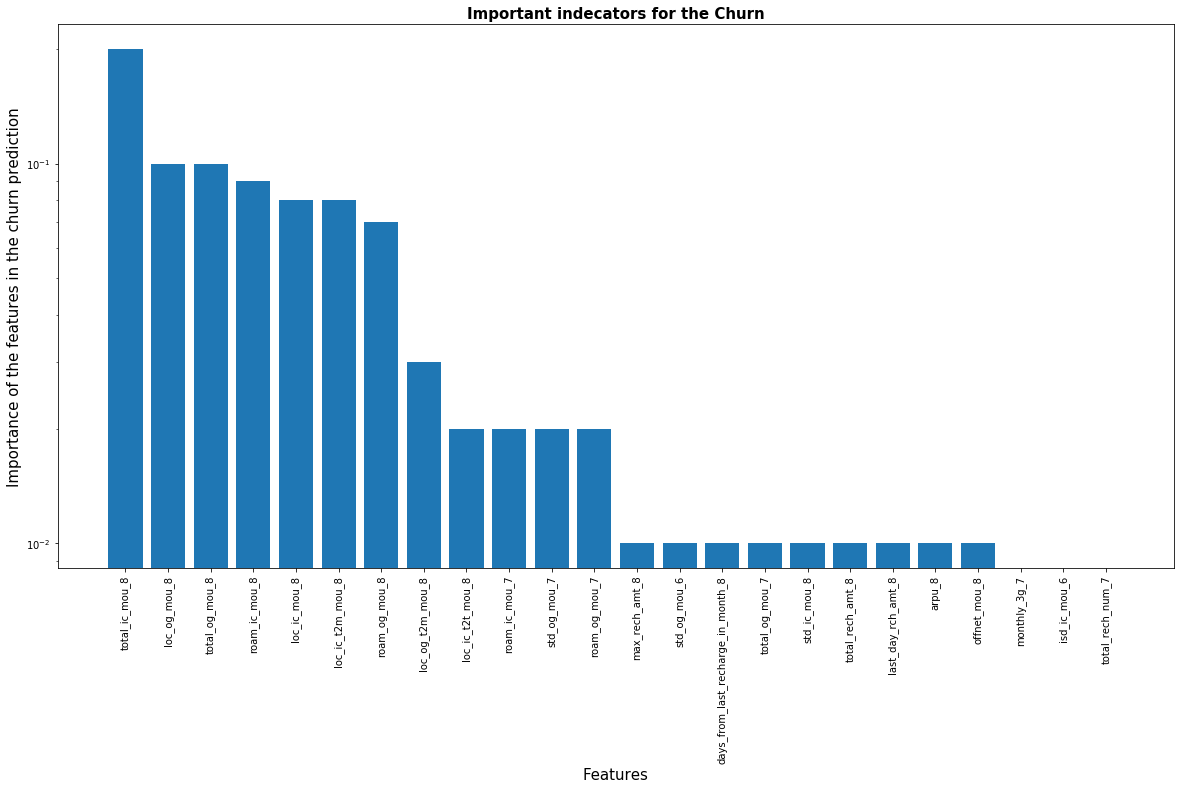

In [63]:
# Plotting the features important for the churn
plt.figure(figsize=(20,10))
plt.title('Important indecators for the Churn', fontsize=15, fontweight='bold')
plt.bar(feature_imp['Feature'], feature_imp['Importance'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Importance of the features in the churn prediction', fontsize=15)
plt.xticks(feature_imp['Feature'], fontsize=10, rotation=90)
plt.yscale('log')
plt.show()

In [65]:
# Building model with the best hyperparameters also considering the graph, we can use only 22 features
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=8,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=22,
                             n_estimators=100)

In [66]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features=22, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [67]:
# predicting the churn values with the built model.
predictions = rfc.predict(X_test)

In [68]:
#Evaluating model on test set prediction
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      7951
           1       0.57      0.12      0.20       275

    accuracy                           0.97      8226
   macro avg       0.77      0.56      0.59      8226
weighted avg       0.96      0.97      0.96      8226



In [69]:
print(confusion_matrix(y_test,predictions))

[[7926   25]
 [ 242   33]]


### We have achieved 57% precision in predicting the churn with overall accuracy of 97% for model 2.

## Recommendations for the churn

### The above two models are efficient in predicting the probable customer to be churned. Below is the strategy for the possible customers to be churned.

- **Indetify**: Identify the possible customers that could churn, using the above 2 models.
- **Check the possible causes**: As indicated by the important features for churn in model 2, try to check the respective service areas if there was any recent change in plan or quality of service. If anything identified, try to resolve the problem.
- **Try to retain the custoemr** : Finally, contact the possible to be churned customers and try to offer them competitive price for the indicated services identified in the model 2.    